In [1]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [2]:
# #binding
c=1
N = [c 1 -1]
x_sym = [:E, :S, :C]
q_sym = [:tE, :tS]
K_sym = [:K]

model = Bnc(N = N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

Bnc{Int8}([1 1 -1], [1 0 1; 0 1 1], 1, 3, 2, Num[E, S, C], Num[tE, tS], Num[K], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], sparse(Int64[], Int64[], Int8[], 0, 0), sparse(Int64[], Int64[], SparseVector{Int8, Int8}[], 0, 0), sparse(Int64[], Int64[], SparseVector{Float64, Int8}[], 0, 0), Dict{Vector{Int8}, Any}(), Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), -1, [0.0, 0.0, 0.0], [0.3010299956639812, 0.3010299956639812, 0.0], false, sparse([1, 2, 1, 2], [1, 2, 3, 3], [1, 1, 1, 1], 2, 3), sparse([1, 2, 1, 2], [1, 2, 3, 3], [1, 1, 1, 1], 2, 3), [[1, 3], [2, 3]], sparse([1, 1, 1], [1, 2, 3], [1, 1, -1], 1, 3), sparse([1, 3, 2, 3, 1, 2, 3], [1, 1, 2, 2, 3, 3, 3], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0], 3, 3), [1, 3, 5, 6], [1, 2, 1, 2], [1, 2, 3, 3], [2, 4, 7], [3, 3, 3], [1, 2, 3], [1, 3], SparseArrays.UMFPACK.UmfpackLU{Float64, Int64}(SparseArrays.UMFPACK.Symbolic{Float64, Int64}(Ptr{Nothing} @0x000000000bfdb8f0), SparseArrays.UMFPACK.Numeric{F

In [3]:
get_C_C0_qK!(model, [3,3])[1]

Start finding all vertices, it may takes a while.
Done, with 4 vertices found and 4 asymptotic vertices.
Start calculating nullity for each vertex, it may takes a while.
Done.


2×3 SparseMatrixCSC{Float64, Int64} with 5 stored entries:
 -1.0  1.0    ⋅ 
  1.0  1.0  -2.0

In [4]:
get_vertices_mapping_dict(model)

Dict{Vector{Int8}, Int64} with 4 entries:
  [1, 3] => 2
  [3, 3] => 4
  [1, 2] => 1
  [3, 2] => 3

In [5]:
get_vertices_neighbor_mat!(model)

Start calculating vertex neighbor matrix, It may takes a while.
Done.


4×4 SparseMatrixCSC{Int8, Int64} with 4 stored entries:
 ⋅  2  1  ⋅
 ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  2
 ⋅  ⋅  ⋅  ⋅

In [6]:
get_H!(model,1)

3×3 SparseMatrixCSC{Float64, Int64} with 5 stored entries:
 1.0   ⋅     ⋅ 
  ⋅   1.0    ⋅ 
 1.0  1.0  -1.0

In [7]:
get_P_P0!(model,2)[1]

2×3 SparseMatrixCSC{Int64, Int64} with 2 stored entries:
 1  ⋅  ⋅
 ⋅  ⋅  1

In [8]:
get_H!(model,[3,3])

3×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
  1.0  -1.0   ⋅ 
 -1.0   1.0   ⋅ 
   ⋅     ⋅    ⋅ 

In [9]:
calc_volume(model,[1,2])

(0.3335646393545843, 0.0009240940456361361)

In [10]:
show_qK_space_condition(model,[1,2],log_space=false) .|> display

(K / tS) > 1

(K / tE) > 1

2-element Vector{Nothing}:
 nothing
 nothing

In [11]:
get_C_C0_qK!(model,1)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
   ⋅   -1.0  1.0
 -1.0    ⋅   1.0

In [12]:
get_C_C0_qK!(model,2)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 1.0  -1.0    ⋅ 
 1.0    ⋅   -1.0

In [13]:
get_C_C0_x!(model,4)[1]

2×3 SparseMatrixCSC{Int64, Int64} with 4 stored entries:
 -1   ⋅  1
  ⋅  -1  1

In [14]:
get_C_C0_qK!(model,2)[1]

2×3 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 1.0  -1.0    ⋅ 
 1.0    ⋅   -1.0

In [15]:
min_logE = -6
min_logS = -6
max_logE = 6
max_logS = 6
K=1
points = 1000 # points each dimension
logE_rg = range(min_logE,max_logE,points)
logS_rg = range(min_logS,max_logS,points)


#  minE, minS;          minE,maxS;
#
#  maxE; minS;          maxE,maxS;

data = Matrix{Vector{Float64}}(undef, points,points)

# Calculate the first column
data[:,1] .= x_traj_with_q_change(model,[min_logE,min_logS],[max_logE,min_logS]; K=[K],input_logspace=true, output_logspace=true,saveat=range(0,1,points),ensure_manifold=false)[2]

#E conc for each row.
row_e = collect(range(min_logE, max_logE, length=points))

Threads.@threads for i in 1:points
    start_q = [row_e[i], min_logS]
    end_q = [row_e[i], max_logS]
    start_logx = data[i,1]
    data[i,1:end] .= x_traj_with_q_change(model, start_q, end_q; K=[K], startlogx = start_logx, input_logspace=true, output_logspace=true,saveat=range(0,1,points),ensure_manifold=false)[2]
end

In [16]:
using ImageFiltering
function find_bounds(lattice)
    col_asym_x_bounds = imfilter(lattice, Kernel.Laplacian(), "replicate") # findboundary
    edge_map = col_asym_x_bounds .!= 0
    return edge_map
end

find_bounds (generic function with 1 method)

In [17]:
# Find the regime of x

vtx_asym_x = data .|> x->assign_vertex_x(model, x,input_logspace=true; asymptotic=true)
vtx_nonasym_x = data .|> x->assign_vertex_x(model, x,input_logspace=true; asymptotic=false)
vtx_asym_qK = data .|> x->assign_vertex_qK(model; x=x,input_logspace=true , asymptotic=true) 
vtx_nonasym_qK = data .|> x->assign_vertex_qK(model; x=x,input_logspace=true , asymptotic=false)

col_asym_x = map(g -> model.vertices_idx[g], vtx_asym_x) #|> x -> reshape(x,shape_q)
col_nonasym_x = map(g -> model.vertices_idx[g], vtx_nonasym_x)# |> x -> reshape(x,shape_q)
col_asym_qK = map(g -> model.vertices_idx[g], vtx_asym_qK) #|> x -> reshape(x,shape_q)
col_nonasym_qK = map(g -> model.vertices_idx[g], vtx_nonasym_qK)# |> x -> reshape(x,shape_q)

bnds_asym_x = find_bounds(col_asym_x)
bnds_nonasym_x = find_bounds(col_nonasym_x)
bnds_asym_qK = find_bounds(col_asym_qK)
bnds_nonasym_qK = find_bounds(col_nonasym_qK)

(minval,maxval) = values(model.vertices_idx) |> x->(minimum(x),maximum(x))

print("Done")

Done

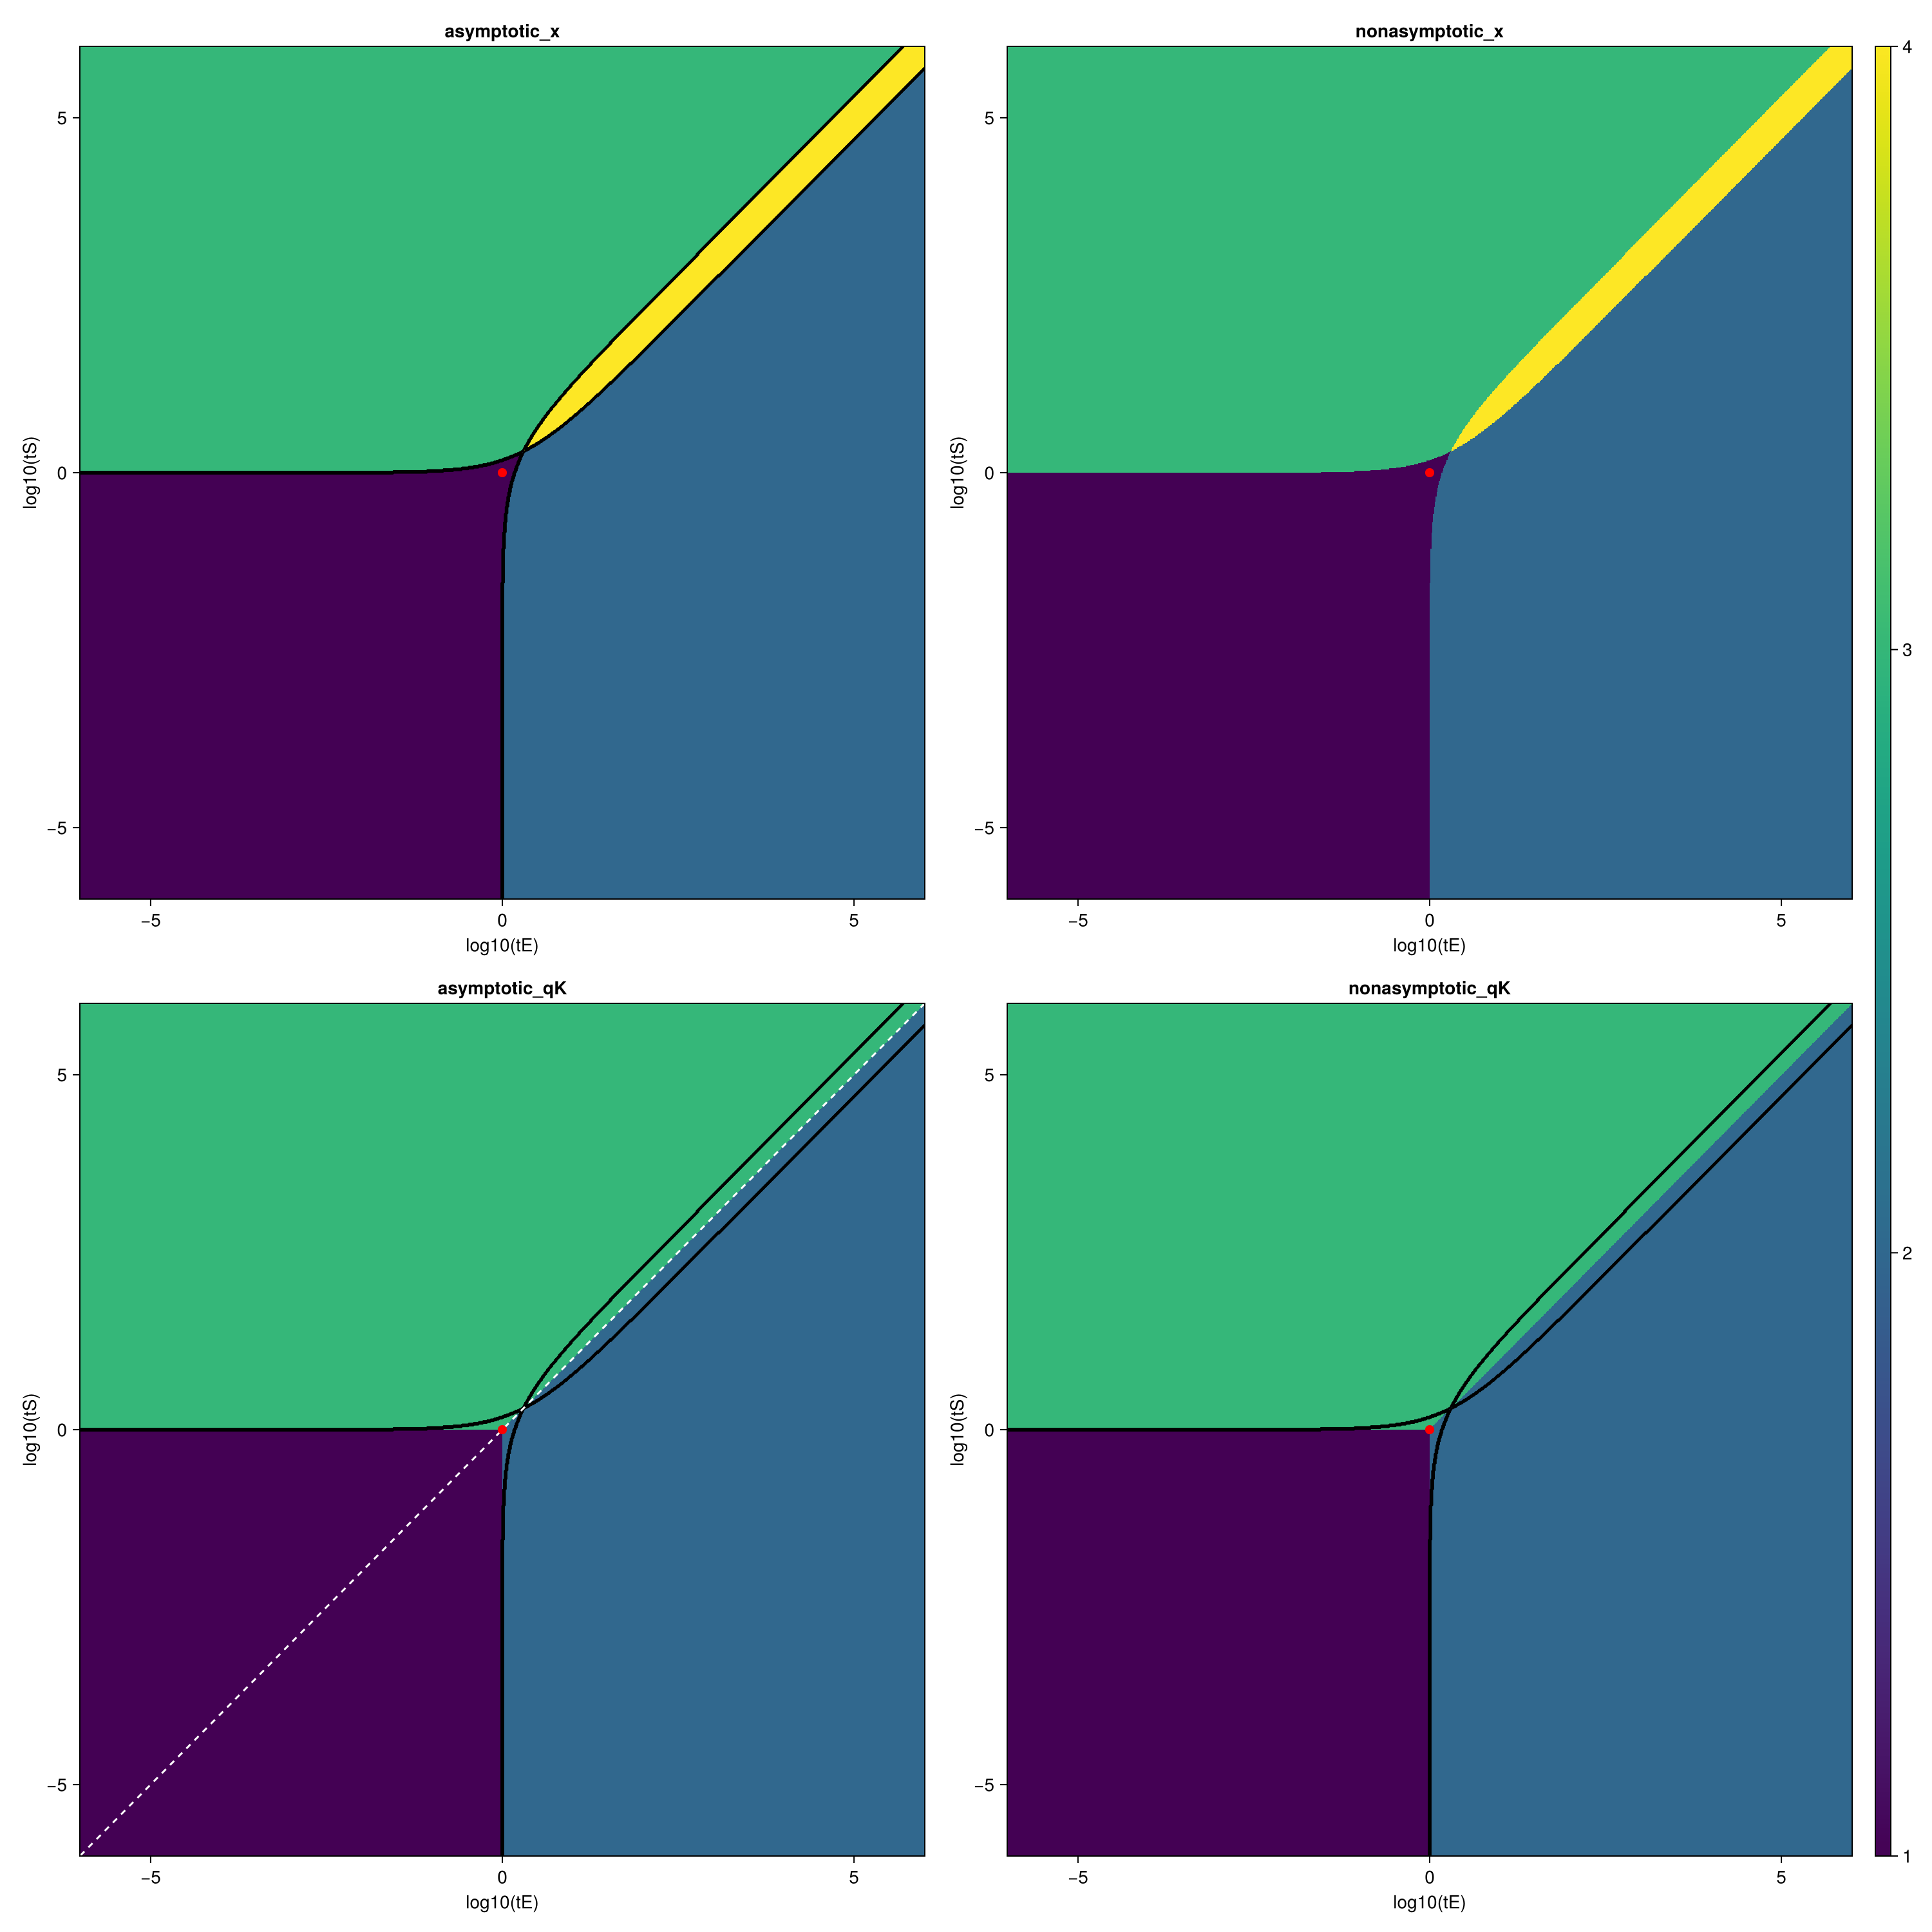

CairoMakie.Screen{IMAGE}


In [ ]:
using CairoMakie
# using GLMakie

f = Figure(size=(1500,1500))
p1 = Axis(f[1, 1])
p2 = Axis(f[1, 2])
p3 = Axis(f[2, 1])
p4 = Axis(f[2, 2])

# --- Plot 1: asymptotic_x ---
p1.title = "asymptotic_x"
heatmap!(p1, logE_rg, logS_rg, col_asym_x, colormap=:viridis, colorrange=(minval, maxval))
contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)
# --- Plot 2: nonasymptotic_x ---
p2.title = "nonasymptotic_x"
heatmap!(p2, logE_rg, logS_rg, col_nonasym_x, colormap=:viridis, colorrange=(minval, maxval))

# --- Plot 3: asymptotic_qK ---
p3.title = "asymptotic_qK"
heatmap!(p3, logE_rg, logS_rg, col_asym_qK, colormap=:viridis, colorrange=(minval, maxval))
contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)

# --- Plot 4: nonasymptotic_qK ---
p4.title = "nonasymptotic_qK"
heatmap!(p4, logE_rg, logS_rg, col_nonasym_qK, colormap=:viridis, colorrange=(minval, maxval))
contour!(p4, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

for p in [p1, p2, p3, p4]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

Make sure directly calculate asym qK space is identical to qK mapping back x using P and calc asym x space.

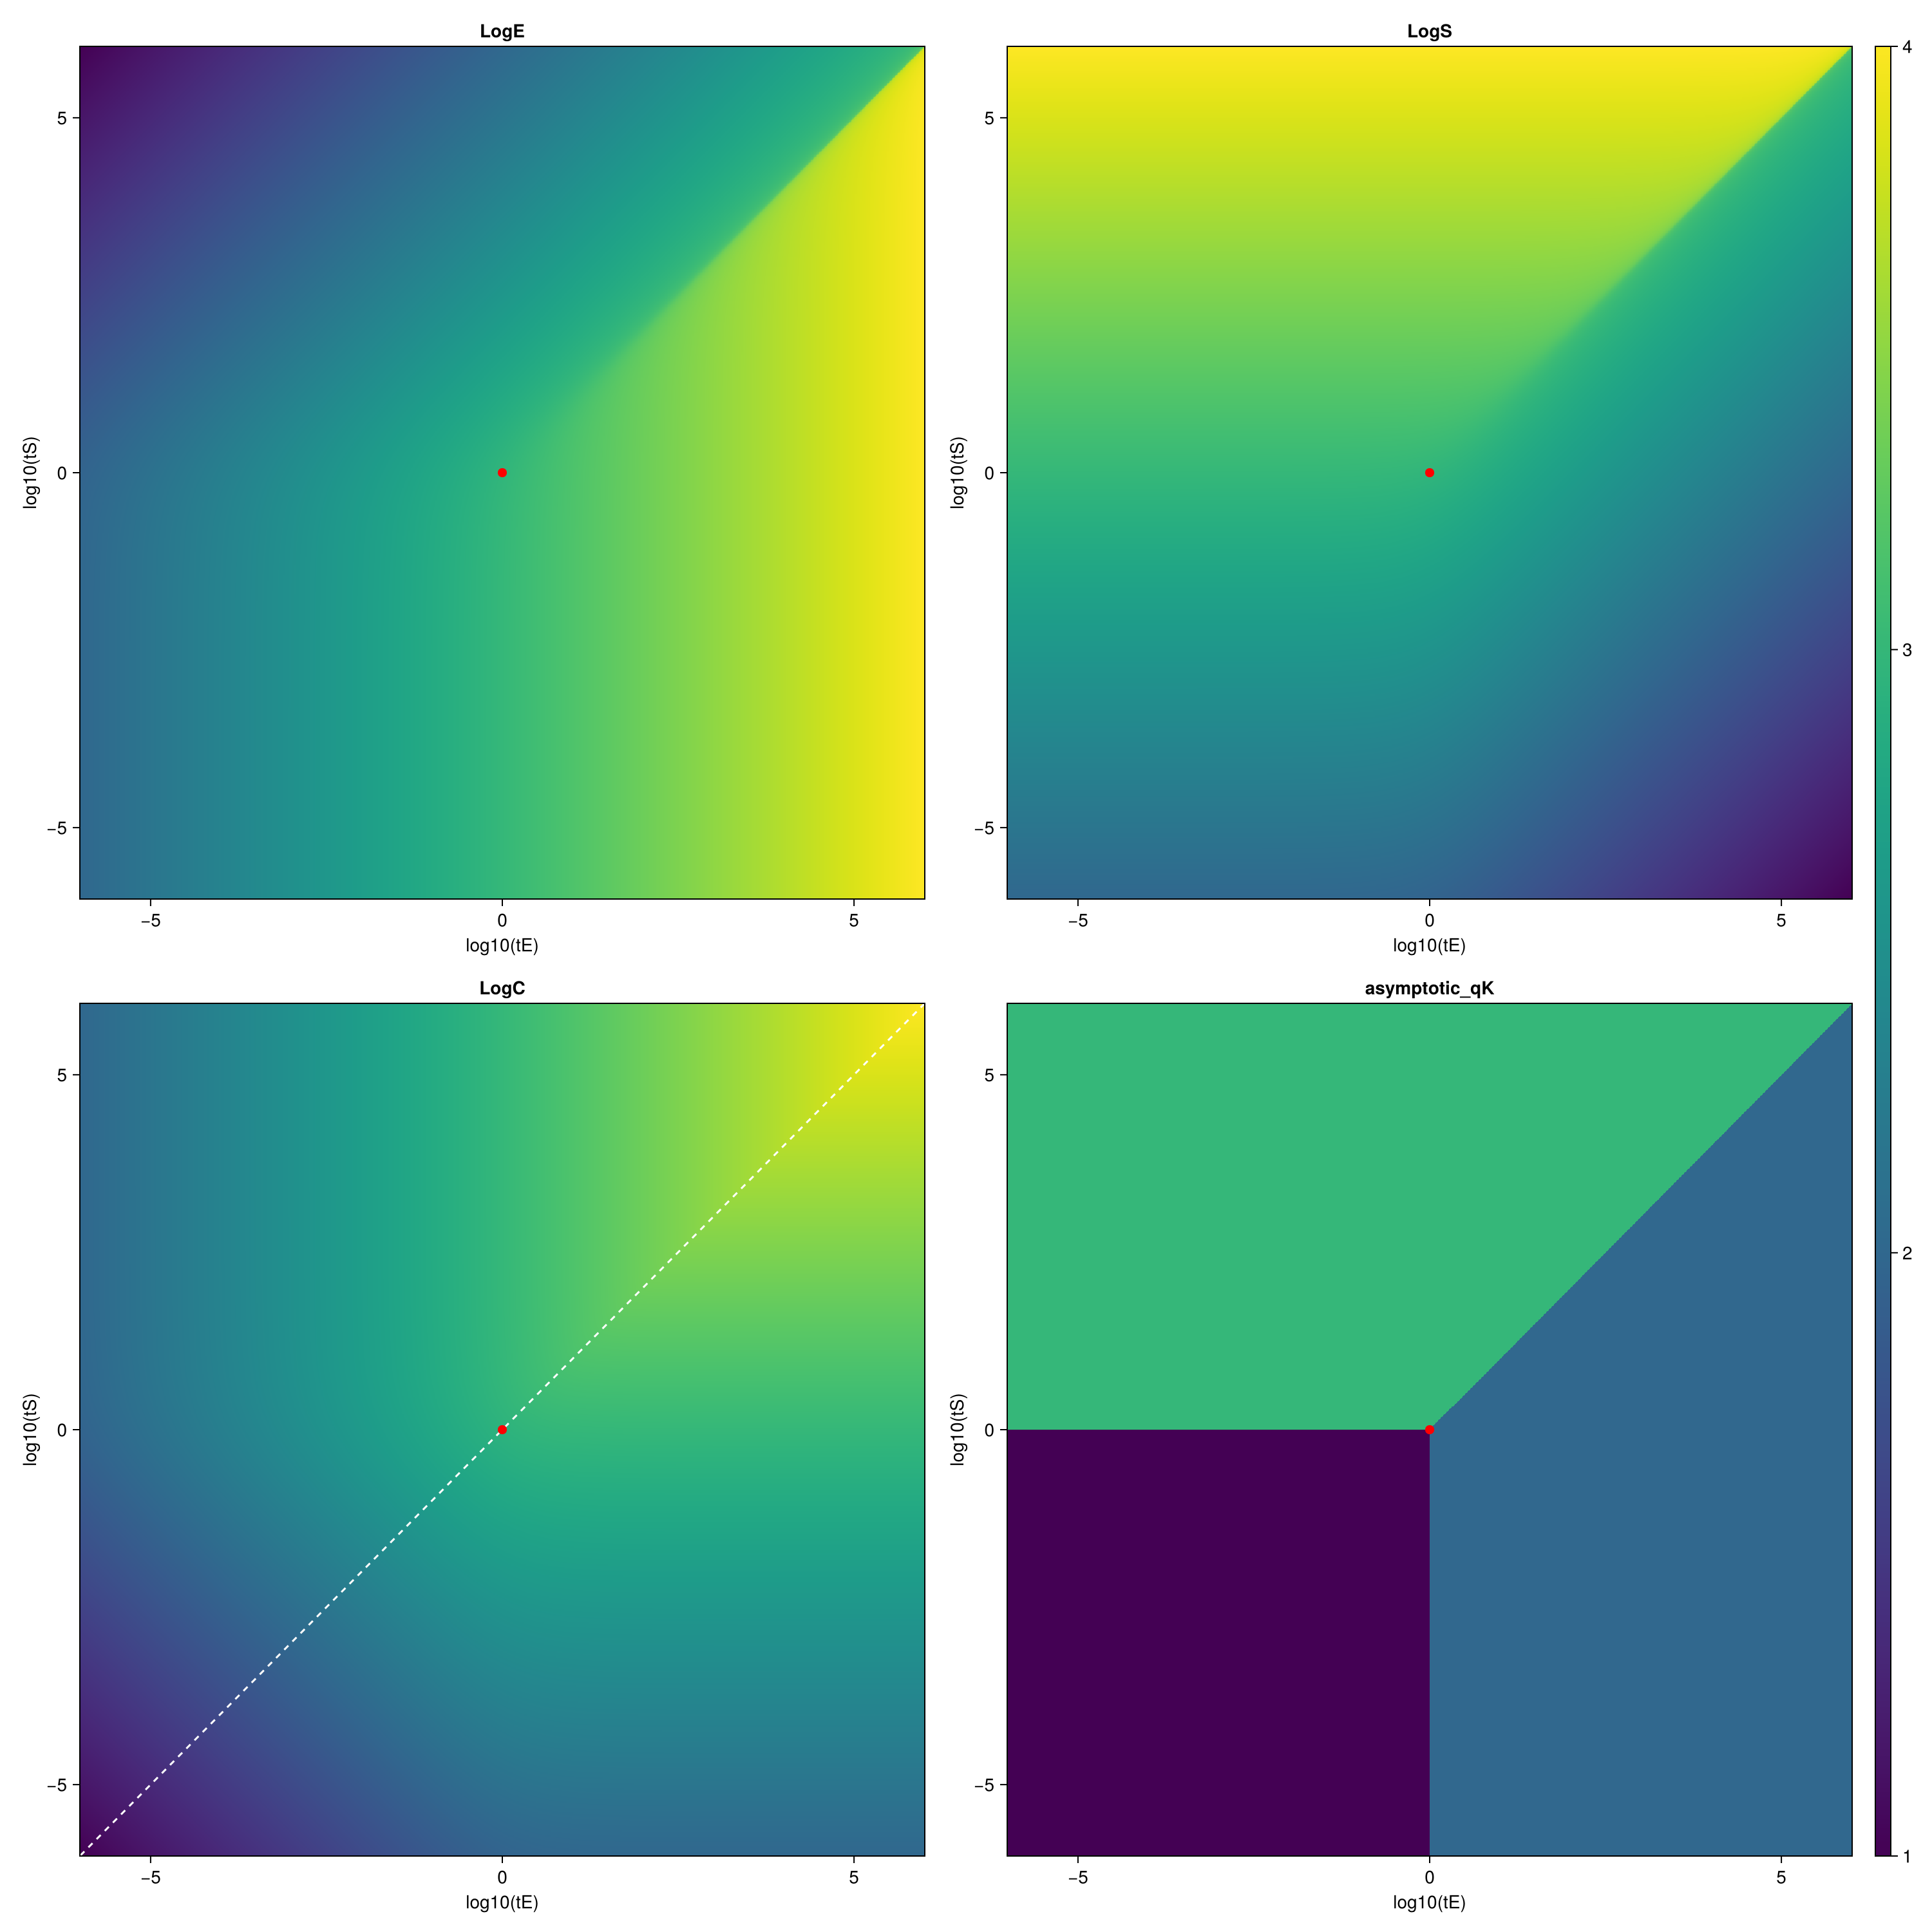

CairoMakie.Screen{IMAGE}


In [19]:
# using GLMakie
f = Figure(size=(1500,1500))
p1 = Axis(f[1, 1])
p2 = Axis(f[1, 2])
p3 = Axis(f[2, 1])
p4 = Axis(f[2, 2])


p1.title = "LogE"
heatmap!(p1, logE_rg, logS_rg, data .|> x->x[1], colormap=:viridis)
# contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

p2.title = "LogS"
heatmap!(p2, logE_rg, logS_rg, data .|> x->x[2], colormap=:viridis)


p3.title = "LogC"
heatmap!(p3, logE_rg, logS_rg, data .|> x->x[3], colormap=:viridis)
# contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)


p4.title = "asymptotic_qK"
heatmap!(p4, logE_rg, logS_rg, col_asym_qK, colormap=:viridis, colorrange=(minval, maxval))
# contour!(p4, logE_rg, logS_rg, bnds_asym_qK, color = :black)

for p in [p1, p2, p3, p4]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

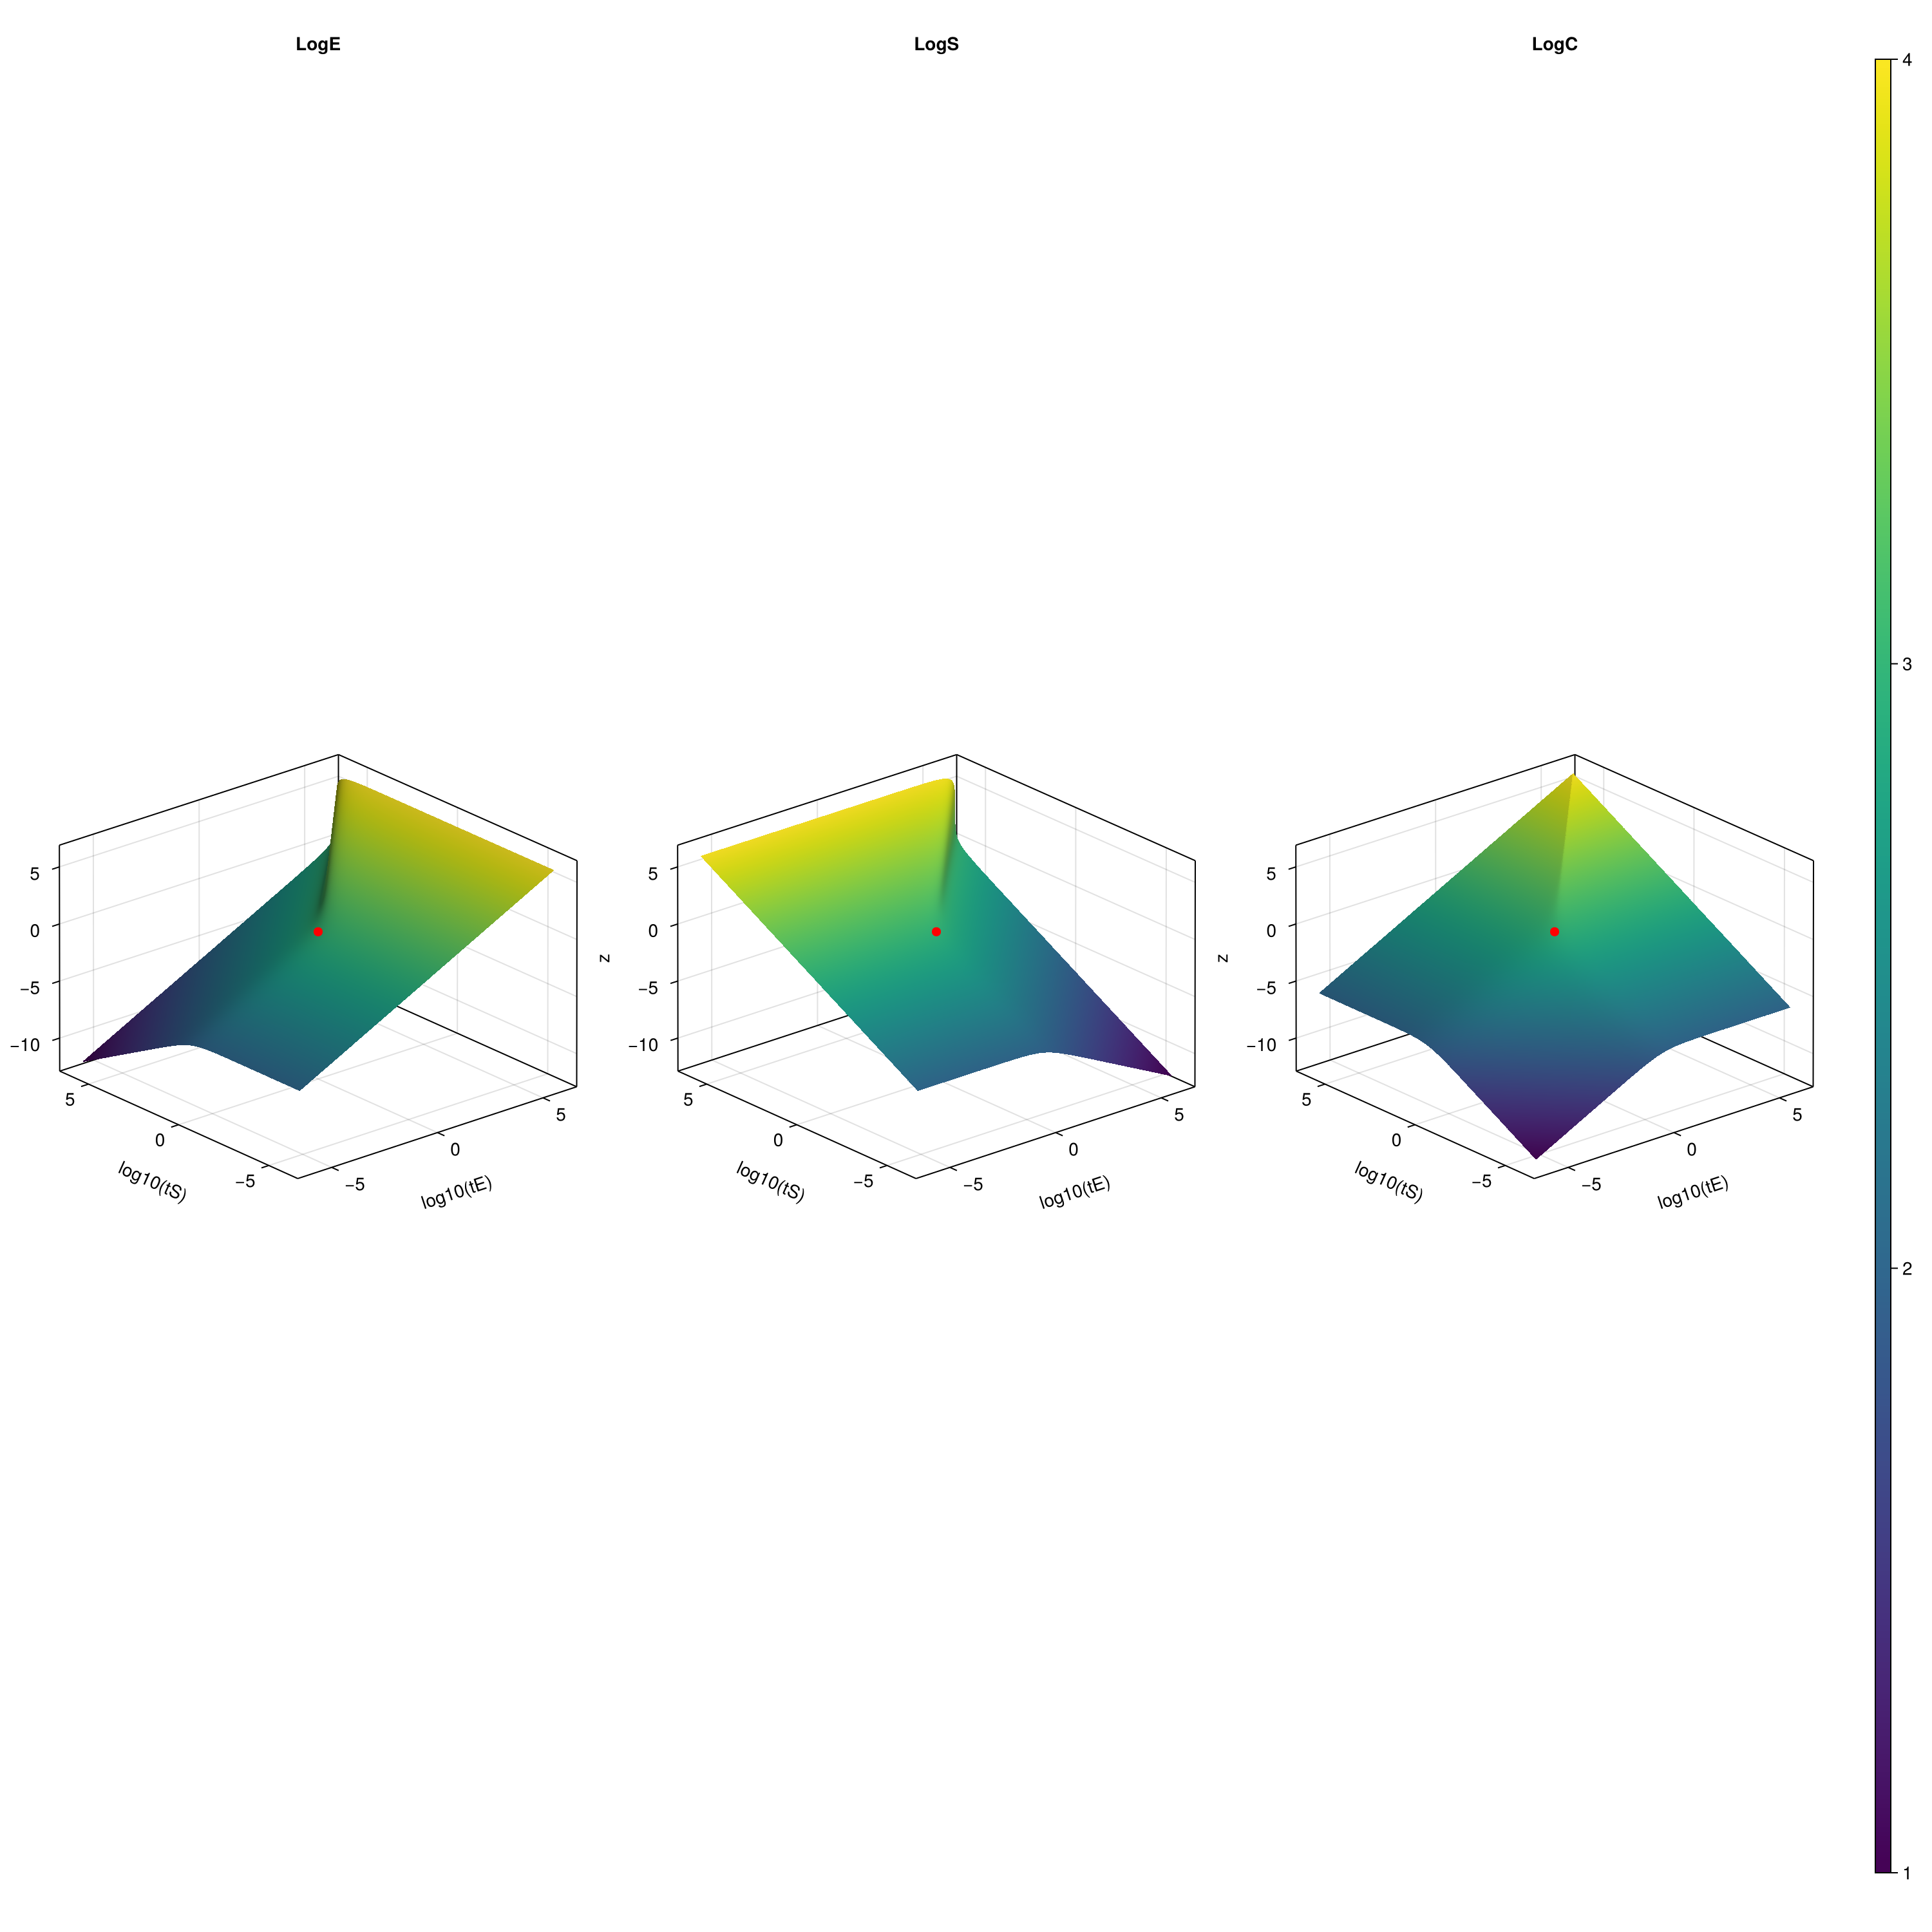

CairoMakie.Screen{IMAGE}


In [20]:
#3D plot
# using GLMakie
f = Figure(size=(1500,1500))
p1 = Axis3(f[1, 1])
p2 = Axis3(f[1, 2])
p3 = Axis3(f[1, 3])
# p4 = Axis(f[2, 2])

p1.title = "LogE"
surface!(p1, logE_rg, logS_rg, data .|> x->x[1], colormap=:viridis)
# contour!(p1, logE_rg, logS_rg, bnds_nonasym_x,color = :black)

p2.title = "LogS"
surface!(p2, logE_rg, logS_rg, data .|> x->x[2], colormap=:viridis)

p3.title = "LogC"
surface!(p3, logE_rg, logS_rg, data .|> x->x[3], colormap=:viridis)
# contour!(p3, logE_rg, logS_rg, bnds_nonasym_x, color = :black)
# lines!(p3, [-6,6], [-6,6], color=:white, linestyle=:dash)

for p in [p1, p2, p3, ]
    # Add the red dot
    scatter!(p, [log10(K)/c], [log10(K)/c],[0], marker=:circle, markersize=10, color=:red)
    # Set the axis labels (modern syntax)
    p.xlabel = "log10(tE)"
    p.ylabel = "log10(tS)"
end
Colorbar(f[:,end+1], colorrange = (minval, maxval))

display(f)

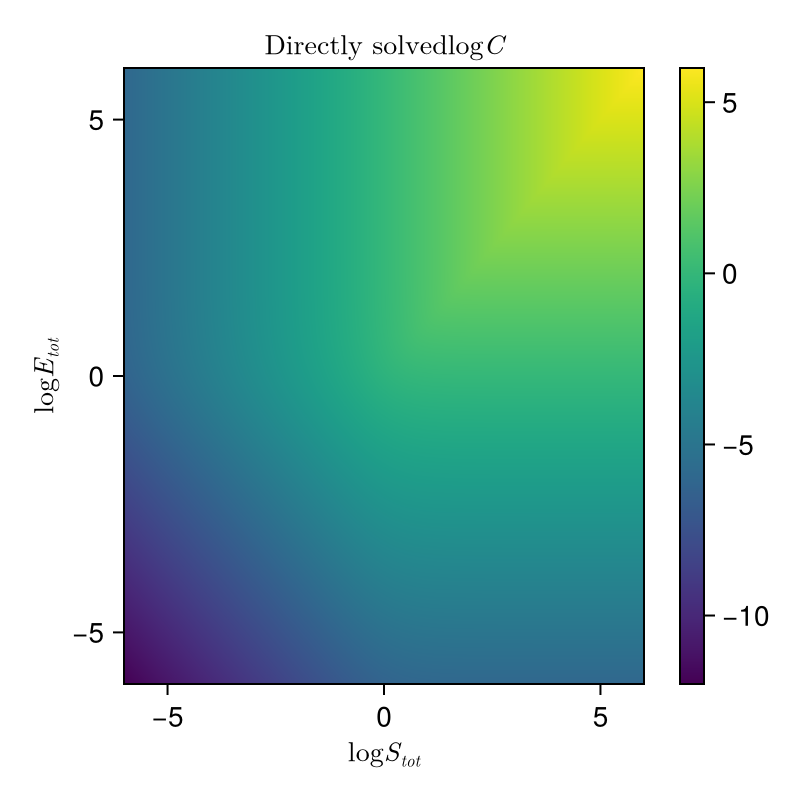

In [35]:

fig =Figure(size=(400,400),backgroundcolor = :transparent)
ax1 = Axis(fig[1,1],
    ylabel = L"\log E_{tot}",
    xlabel = L"\log S_{tot}",
    title = L"\text{Directly solved} \log C"
)
hm = heatmap!(ax1, logS_rg, logE_rg, (data .|> x->x[3])' ,colormap=:viridis)
Colorbar(fig[1,2],hm)
display(fig)
save("/mnt/d/Documents/Direct_solved_logC.png", fig,px_per_unit = 4)

In [27]:
MM(Et,St,K) = Et*St/(St+K)

MM (generic function with 1 method)

In [33]:
MM_data = @. log10(MM(exp10(logE_rg),exp10.(logS_rg'),1))

1000×1000 Matrix{Float64}:
 -12.0         -11.988       -11.976       …  -6.0      -6.0      -6.0
 -11.988       -11.976       -11.964          -5.98799  -5.98799  -5.98799
 -11.976       -11.964       -11.952          -5.97598  -5.97598  -5.97598
 -11.964       -11.952       -11.9399         -5.96396  -5.96396  -5.96396
 -11.952       -11.9399      -11.9279         -5.95195  -5.95195  -5.95195
 -11.9399      -11.9279      -11.9159      …  -5.93994  -5.93994  -5.93994
 -11.9279      -11.9159      -11.9039         -5.92793  -5.92793  -5.92793
 -11.9159      -11.9039      -11.8919         -5.91592  -5.91592  -5.91592
 -11.9039      -11.8919      -11.8799         -5.9039   -5.9039   -5.9039
 -11.8919      -11.8799      -11.8679         -5.89189  -5.89189  -5.89189
 -11.8799      -11.8679      -11.8559      …  -5.87988  -5.87988  -5.87988
 -11.8679      -11.8559      -11.8438         -5.86787  -5.86787  -5.86787
 -11.8559      -11.8438      -11.8318         -5.85586  -5.85586  -5.85586
   

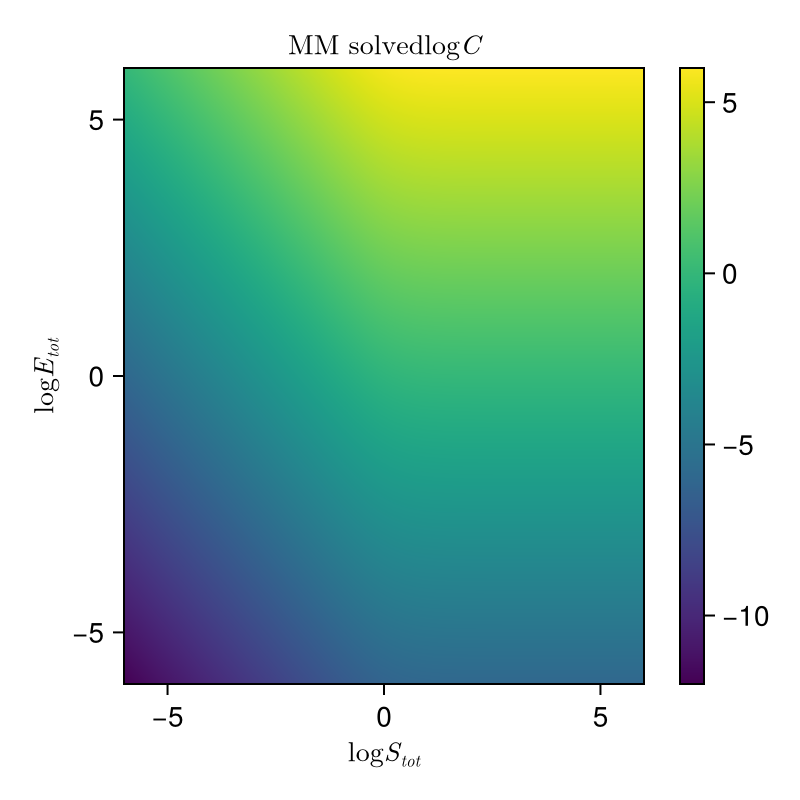

In [36]:
fig =Figure(size=(400,400),backgroundcolor = :transparent)
ax1 = Axis(fig[1,1],
    ylabel = L"\log E_{tot}",
    xlabel = L"\log S_{tot}",
    title = L"\text{MM solved} \log C"
)
hm = heatmap!(ax1, logS_rg, logE_rg, MM_data' ,colormap=:viridis)
Colorbar(fig[1,2],hm)
display(fig)
save("/mnt/d/Documents/MM_solved_logC.png", fig,px_per_unit = 4)

In [34]:
# using ImageFiltering
# convolved_data = imfilter(labels_lattice, Kernel.Laplacian(), "replicate") # findboundary
# edge_map = convolved_data .!= 0
# print("Done")

# using Plots; #pythonplot()
   
# # scatter(log10.(q[:,1]),log10.(q[:,2]),zcolor = log10.(x[:,3]),
# #     xlabel="log10(tE)", ylabel="log10(tS)",
# #     # title="BNC model with K=1",
# #     xticks = (-2:0.5:2), yticks = (-2:0.5:2),
# #     clims = (0,3), c=:black, cbar=false,
# #     size = (700,600), legend=false)

# heatmap(logq_rg, logq_rg,log10.(reshape(x[:,3],shape)),colormap=:viridis,size=(500,500),)
# # plot!([-2,0],[0,0],line=(1.5,:dash,:red))
# # plot!([0,0],[-2,0],line=(1.5,:dash,:red))
# # plot!([0,2],[0,2],line=(1.5,:dash,:red),legend=false)
# contour!(logq_rg, logq_rg,edge_map,levels=[0.999],color=[:black],size = (500,500))
# # annotate!(-1.5,-1.5, "①")
# # annotate!(-1.5,1.5, "②")
# # annotate!(1.5,-1.5, "③")
# # annotate!(1.5,1.5,"④")

# # plot!([-2,0],[0,0],line=(4,:dash,0.6,:red))
# xlabel!("log10(tE)")
# ylabel!("log10(tS)")
# title!("log10C(tE,tS)")


In [ ]:
find_all_vertices!(model) |> length

4

In [ ]:
model = Bnc(L=L_generator(10,20))

Bnc{Int8}([1 1 … 0 0; 0 1 … 0 0; … ; 2 1 … -1 0; 0 0 … 0 -1], [1 0 … 2 0; 0 1 … 1 0; … ; 0 0 … 1 1; 0 0 … 1 0], 10, 20, 10, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀, x₁₁, x₁₂, x₁₃, x₁₄, x₁₅, x₁₆, x₁₇, x₁₈, x₁₉, x₂₀], Num[q₁, q₂, q₃, q₄, q₅, q₆, q₇, q₈, q₉, q₁₀], Num[K₁, K₂, K₃, K₄, K₅, K₆, K₇, K₈, K₉, K₁₀], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], sparse(Int64[], Int64[], Bool[], 0, 0), sparse(Int64[], Int64[], Int8[], 0, 0), sparse(Int64[], Int64[], Int8[], 0, 0), Dict{Vector{Int8}, Any}(), 1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.7781512503836436, 0.9030899869919435, 0.8450980400142568, 0.7781512503836436, 0.8450980400142568, 0.6989700043360189, 0.8450980400142568, 0.7781512503836436, 0.8450980400142568, 0.8450980400142568, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], false, sparse([1, 11, 16, 17, 19, 2, 11, 12, 13, 16  …  17, 19, 20, 10, 11, 15, 16, 17, 18, 19], [1, 1, 1, 1, 1, 2

In [ ]:
get_nonsingular_vertices_idx(model)[100]

194

In [ ]:
H = get_H!(model,194)

20×20 SparseMatrixCSC{Float64, Int64} with 70 stored entries:
⎡⠵⢄⠀⠈⠀⠁⠄⠀⠀⠁⎤
⎢⣀⢀⣑⣄⣀⡀⠀⠀⠀⡀⎥
⎢⣀⡀⠀⠠⠑⢀⡀⠀⡀⡀⎥
⎢⣀⢁⣂⣄⣢⡀⠐⢄⠀⡀⎥
⎣⣄⡑⡀⠊⡐⠁⡁⠀⠑⢀⎦

In [ ]:
Base.summarysize(model)

69051352

In [ ]:
get_C_C0_qK!(model,4)[1]

0×0 SparseMatrixCSC{Float64, Int64} with 0 stored entries

In [2]:
@variables C Et 

2-element Vector{Num}:
  C
 Et

In [8]:
mt = [1 - C/Et  0  C/Et
 0 1 0
 1 1 -1]

3×3 Matrix{Num}:
 1 + (-C) / Et  0  C / Et
             0  1       0
             1  1      -1

In [11]:
mt_inv = inv(mt) .|> simplify

3×3 Matrix{Num}:
 1.0       C / (-Et)         C / Et
   0             1.0              0
 1.0  (-C + Et) / Et  (C - Et) / Et

In [12]:
mt_inv[3,2]

(-C + Et) / Et

In [4]:
M = get_M!(model,[3,3])

Start finding all vertices, it may takes a while.
Done, with 4 vertices found and 4 real vertices.


3×3 SparseMatrixCSC{Int64, Int64} with 5 stored entries:
 ⋅  ⋅   1
 ⋅  ⋅   1
 1  1  -1

In [5]:
Cx = get_C_x!(model,[3,3])

2×3 SparseMatrixCSC{Int64, Int64} with 4 stored entries:
 -1   ⋅  1
  ⋅  -1  1

In [10]:
CqK = Cx * pinv(Array(M))

2×3 Matrix{Float64}:
 0.25  0.25  -0.5
 0.25  0.25  -0.5

In [11]:
model = Bnc(N = N_generator(5,10))

Bnc{Int8}([0 0 … 0 0; 1 1 … 0 0; … ; 0 1 … -1 0; 0 1 … 1 -1], [1 0 … 0 0; 0 1 … 1 2; … ; 0 0 … 1 1; 0 0 … 1 1], 5, 10, 5, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀], Num[q₁, q₂, q₃, q₄, q₅], Num[K₁, K₂, K₃, K₄, K₅], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], sparse(Int64[], Int64[], Int8[], 0, 0), sparse(Int64[], Int64[], SparseVector{Int8, Int8}[], 0, 0), sparse(Int64[], Int64[], SparseVector{Float64, Int8}[], 0, 0), Dict{Vector{Int8}, Any}(), Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), -1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.3010299956639812, 0.6989700043360189, 0.0, 0.6989700043360189, 0.6989700043360189, 0.0, 0.0, 0.0, 0.0, 0.0], false, sparse([1, 2, 3, 4, 5, 4, 5, 1, 2, 4, 5, 2, 4, 5, 2, 4, 5], [1, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], 5, 10), sparse([1, 2, 3, 4, 5, 4, 5, 1, 2, 4, 5, 2, 4, 5, 2, 4, 5], [1, 2, 3, 4, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9,

In [12]:
model.L

5×10 Matrix{Int64}:
 1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  1  0  1  2
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  1  1  1
 0  0  0  0  1  1  0  1  1  1

In [16]:
vtx = find_all_vertices!(model)
vtx2 = filter(vtx) do v
    v[2]==10 && v[4] ==10 & v[5]==10
end
get_idx(model,[1,10,3,10,10])

97

In [17]:
Cx = get_C_x!(model,97)

12×10 SparseMatrixCSC{Int64, Int64} with 24 stored entries:
 1   ⋅  ⋅   ⋅   ⋅   ⋅  -1   ⋅   ⋅  ⋅
 ⋅  -1  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅  -1   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1  1
 ⋅   ⋅  ⋅  -1   ⋅   ⋅   ⋅   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅  -1   ⋅   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  -1   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1  1
 ⋅   ⋅  ⋅   ⋅  -1   ⋅   ⋅   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅  -1   ⋅   ⋅   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  -1   ⋅  1
 ⋅   ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -1  1

In [18]:
M = get_M!(model,97)

10×10 SparseMatrixCSC{Int64, Int64} with 20 stored entries:
 1  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   1
 ⋅  ⋅  1  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   1
 ⋅  ⋅  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   ⋅   1
 ⋅  ⋅  ⋅  1  1  -1   ⋅   ⋅   ⋅   ⋅
 1  1  ⋅  ⋅  ⋅   ⋅  -1   ⋅   ⋅   ⋅
 ⋅  ⋅  ⋅  1  1   ⋅   ⋅  -1   ⋅   ⋅
 ⋅  1  ⋅  ⋅  ⋅   ⋅   ⋅   1  -1   ⋅
 ⋅  1  ⋅  ⋅  ⋅   ⋅   ⋅   ⋅   1  -1

In [23]:
pinv(Array(M)) |> sparse |> x->droptol!(x,1e-10)

10×10 SparseMatrixCSC{Float64, Int64} with 68 stored entries:
  1.0         ⋅          ⋅    ⋅         …    ⋅          ⋅         ⋅ 
 -0.0769231  0.153846    ⋅   0.153846       0.230769   0.384615  0.461538
   ⋅          ⋅         1.0   ⋅              ⋅          ⋅         ⋅ 
  0.0769231  0.0128205   ⋅   0.0128205      0.269231   0.115385  0.0384615
  0.0769231  0.0128205   ⋅   0.0128205      0.269231   0.115385  0.0384615
  0.153846   0.025641    ⋅   0.025641   …   0.538462   0.230769  0.0769231
  0.923077   0.153846    ⋅   0.153846       0.230769   0.384615  0.461538
  0.153846   0.025641    ⋅   0.025641      -0.461538   0.230769  0.0769231
  0.0769231  0.179487    ⋅   0.179487      -0.230769  -0.384615  0.538462
   ⋅         0.333333    ⋅   0.333333        ⋅          ⋅         ⋅ 

In [27]:
nullspace(Array(M)') |> sparse |> x->droptol!(x,1e-10)

10×2 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
   ⋅           ⋅ 
 -0.663257   -0.47619
   ⋅           ⋅ 
 -0.0807638   0.812492
  0.744021   -0.336303
   ⋅           ⋅ 
   ⋅           ⋅ 
   ⋅           ⋅ 
   ⋅           ⋅ 
   ⋅           ⋅ 

In [31]:
# q[2], q[4],q[5] shall be the same, thus
CqK = Cx * pinv(Array(M))

12×10 Matrix{Float64}:
  0.0769231  -0.153846  -2.02904e-16  …  -0.230769  -0.384615  -0.461538
  0.0769231   0.179487   1.7722e-17      -0.230769  -0.384615  -0.461538
 -0.923077    0.179487  -3.37632e-16     -0.230769  -0.384615  -0.461538
 -0.0769231   0.153846  -1.57064e-16      0.230769   0.384615  -0.538462
 -0.0769231   0.320513  -1.36777e-16     -0.269231  -0.115385  -0.0384615
 -0.153846    0.307692  -2.59213e-16  …  -0.538462  -0.230769  -0.0769231
 -0.153846    0.307692  -1.99167e-16      0.461538  -0.230769  -0.0769231
 -0.0769231   0.153846  -1.57064e-16      0.230769   0.384615  -0.538462
 -0.0769231   0.320513  -8.12662e-17     -0.269231  -0.115385  -0.0384615
 -0.153846    0.307692  -2.59213e-16     -0.538462  -0.230769  -0.0769231
 -0.153846    0.307692  -1.99167e-16  …   0.461538  -0.230769  -0.0769231
 -0.0769231   0.153846  -1.57064e-16      0.230769   0.384615  -0.538462

In [32]:
CqK[:,2] .+= CqK[:,4]
CqK[:,2] .+= CqK[:,5]

CqK[:,4] .= 0
CqK[:,5] .= 0

for i in 1:size(CqK,1)
    if any(abs.(CqK[i,:]) .> 1e-5)
        CqK[i,:] ./= findfirst(>(1e-2), abs.(CqK[i,:]))
    end
end

In [33]:
CqK

12×10 Matrix{Float64}:
  0.0769231  -0.461538  -2.02904e-16  …  -0.230769  -0.384615  -0.461538
  0.0769231   0.538462   1.7722e-17      -0.230769  -0.384615  -0.461538
 -0.923077    0.538462  -3.37632e-16     -0.230769  -0.384615  -0.461538
 -0.0769231   0.461538  -1.57064e-16      0.230769   0.384615  -0.538462
 -0.0769231   0.961538  -1.36777e-16     -0.269231  -0.115385  -0.0384615
 -0.153846    0.923077  -2.59213e-16  …  -0.538462  -0.230769  -0.0769231
 -0.153846    0.923077  -1.99167e-16      0.461538  -0.230769  -0.0769231
 -0.0769231   0.461538  -1.57064e-16      0.230769   0.384615  -0.538462
 -0.0769231   0.961538  -8.12662e-17     -0.269231  -0.115385  -0.0384615
 -0.153846    0.923077  -2.59213e-16     -0.538462  -0.230769  -0.0769231
 -0.153846    0.923077  -1.99167e-16  …   0.461538  -0.230769  -0.0769231
 -0.0769231   0.461538  -1.57064e-16      0.230769   0.384615  -0.538462